In [1]:
from sympy import Symbol, Matrix, init_printing, simplify, factor, expand, limit, series, oo, Rational, cancel, collect
init_printing(use_latex=True)
from sympy import gamma as gamma_F
from IPython.display import display as disp
from sympy.solvers.solveset import linsolve

In [2]:
lame = Symbol('\\lambda', positive=True)
bulk = Symbol('K', positive=True)
shear = Symbol('\\mu', positive=True)
density = Symbol('\\rho', real=True, positive=True)
gamma = Symbol('\\gamma', real=True, positive=True)
w2 = Symbol('\\omega^2', real=True, positive=True)
l = Symbol('l', integer=True, positive=True)
pi = Symbol('pi', real=True, positive=True, constant=True)
r = Symbol('r', real=True, positive=True)
g = Symbol('g', real=True, positive=True)

# k2 = l * (l + 1)
k2 = Symbol('k^2', integer=True, positive=True)

#xi = 1 / (lame + 2 * shear)
xi = Symbol('\\xi')

#delta = 2 * shear * (3 * lame + 2 * shear) * xi
delta = Symbol('\\delta')

#epsilon = 4 * k2 * shear * (lame + shear) * xi - 2 * shear
epsilon = Symbol('\\epsilon')

G = gamma * (1 / (Rational(4, 3) * pi * density))

## Differential Equations

In [3]:
y_1 = Symbol('y_1')
y_2 = Symbol('y_2')
y_3 = Symbol('y_3')
y_4 = Symbol('y_4')
y_5 = Symbol('y_5')
y_6 = Symbol('y_6')

dy_1 = Symbol('\\dot{y}_1')
dy_2 = Symbol('\\dot{y}_2')
dy_3 = Symbol('\\dot{y}_3')
dy_4 = Symbol('\\dot{y}_4')
dy_5 = Symbol('\\dot{y}_5')
dy_6 = Symbol('\\dot{y}_6')

M_diff = Matrix(
    [
        [ -2 * lame * xi / r, xi, k2 * lame * xi / r, 0, 0, 0],
        [ -w2 * density - 4 * g * density / r  + 2 * delta / r**2, -4 * shear * xi / r, k2 * g * density /r - k2 * delta / r**2, k2 / r, 0, -density],
        [ -1 / r, 0, 1 / r, 1 / shear, 0, 0],
        [g * density / r - delta / r**2, -lame * xi / r, -w2 * density + epsilon / r**2, -3 / r, -density / r, 0],
        [4 * pi * G * density, 0, 0, 0, 0, 1],
        [0, 0, -4 * pi * G * density * k2 / r, 0, k2 / r**2, -2 / r]
    ]
)

x_diff = Matrix(
    [y_1, y_2 , y_3, y_4, y_5, y_6]
)

(dy_1, dy_2, dy_3, dy_4, dy_5, dy_6) = M_diff * x_diff

y_3_liq = (1 / (w2 * density * r)) * (density * g * y_1 - y_2 - density * y_5)


In [16]:
def collect_y(expr):
    expr = expand(simplify(expr))
    expr = collect(expr, y_1)
    expr = collect(expr, y_2)
    expr = collect(expr, y_3)
    expr = collect(expr, y_4)
    expr = collect(expr, y_5)
    expr = collect(expr, y_6)
    expr = collect(expr, (l * (l + 1)))
    expr = collect(expr, (l + 1))
    return expr

def liquid(expr):
    expr = expr.subs(y_3, y_3_liq)
    expr = expr.subs(xi, 1 / lame)
    expr = expr.subs(delta, 0)
    expr = expr.subs(epsilon, 0)
    expr = expr.subs(lame, bulk - Rational(2, 3) * shear)
    expr = limit(expr, shear, 0, '+')
    expr = limit(expr, lame, bulk)
    return collect_y(expr)

def incompress(expr):
    expr = expr.subs(delta, 2 * shear * (3 * lame + 2 * shear) * xi)
    expr = expr.subs(epsilon, 4 * k2 * shear * (lame + shear) * xi - 2 * shear)
    expr = expr.subs(xi, 1 / (lame + 2 * shear))
    expr = expr.subs(lame, bulk - Rational(2, 3) * shear)
    expr = expand(expr)
    expr = limit(expr, lame, oo, '+')
    expr = limit(expr, bulk, oo, '+')
    
    return collect_y(expr)

def static(expr):
    expr = limit(expr, w2, 0, '+')
    return collect_y(expr)

In [5]:
if False:
    print('Differential Equations')
    i = 1
    for dy in [dy_1, dy_2, dy_3, dy_4, dy_5, dy_6]:
        print(f'dy_{i} - Full')
        disp(collect_y(dy))
        print(f'dy_{i} - Liquid')
        disp(liquid(dy))
        print(f'dy_{i} - Static')
        disp(static(dy))
        print(f'dy_{i} - Incompressible')
        disp(incompress(dy))
        print(f'dy_{i} - Static & Incompressible')
        disp(static(incompress(dy)))
        print(f'dy_{i} - Liquid & Incompressible')
        disp(liquid(incompress(dy)))
        print(f'dy_{i} - Static & Liquid')
        disp(static(liquid(dy)))
        print('\n\n')
        i += 1

C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\envs\arpy\lib\site-packages\IPython\lib\latextools.py:126: Matpl

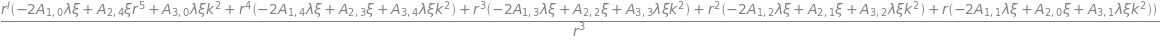

In [5]:
At_10 = Symbol('A_{1,0}')
At_11 = Symbol('A_{1,1}')
At_12 = Symbol('A_{1,2}')
At_13 = Symbol('A_{1,3}')
At_14 = Symbol('A_{1,4}')

At_20 = Symbol('A_{2,0}')
At_21 = Symbol('A_{2,1}')
At_22 = Symbol('A_{2,2}')
At_23 = Symbol('A_{2,3}')
At_24 = Symbol('A_{2,4}')

At_30 = Symbol('A_{3,0}')
At_31 = Symbol('A_{3,1}')
At_32 = Symbol('A_{3,2}')
At_33 = Symbol('A_{3,3}')
At_34 = Symbol('A_{3,4}')

At_40 = Symbol('A_{4,0}')
At_41 = Symbol('A_{4,1}')
At_42 = Symbol('A_{4,2}')
At_43 = Symbol('A_{4,3}')
At_44 = Symbol('A_{4,4}')

At_50 = Symbol('A_{5,0}')
At_51 = Symbol('A_{5,1}')
At_52 = Symbol('A_{5,2}')
At_53 = Symbol('A_{5,3}')
At_54 = Symbol('A_{5,4}')

At_60 = Symbol('A_{6,0}')
At_61 = Symbol('A_{6,1}')
At_62 = Symbol('A_{6,2}')
At_63 = Symbol('A_{6,3}')
At_64 = Symbol('A_{6,4}')


y_1t = r**(l-2) * (At_10 * r**0 + At_11 * r**1 + At_12 * r**2 + At_13 * r**3 + At_14 * r**4)
y_2t = r**(l-2) * (At_20 * r**0 + At_21 * r**1 + At_22 * r**2 + At_23 * r**3 + At_24 * r**4)
y_3t = r**(l-2) * (At_30 * r**0 + At_31 * r**1 + At_32 * r**2 + At_33 * r**3 + At_34 * r**4)
y_4t = r**(l-2) * (At_40 * r**0 + At_41 * r**1 + At_42 * r**2 + At_43 * r**3 + At_44 * r**4)
y_5t = r**(l-2) * (At_50 * r**0 + At_51 * r**1 + At_52 * r**2 + At_53 * r**3 + At_54 * r**4)
y_6t = r**(l-2) * (At_60 * r**0 + At_61 * r**1 + At_62 * r**2 + At_63 * r**3 + At_64 * r**4)

dy_1t = r**(l-2-1) * ((l - 2 + 0) * At_10 * r**0 + (l - 2 + 1) * At_11 * r**1 + 
                      (l - 2 + 2) * At_12 * r**2 + (l - 2 + 3) * At_13 * r**3 + 
                      (l - 2 + 4) * At_14 * r**4)

dy_1t_rhs = dy_1.subs(y_1, y_1t).subs(y_2, y_2t).subs(y_3, y_3t).subs(y_4, y_4t).subs(y_5, y_5t).subs(y_5, y_5t)
dy_1t_rhs = cancel(expand(simplify(dy_1t_rhs)))
# dy_1t_rhs = dy_1t_rhs.collect(r)
dy_1t_rhs = dy_1t_rhs.collect(r**(l))
dy_1t_rhs = dy_1t_rhs.collect(r**(4))

disp(dy_1t_rhs)

disp(dy_1t)

In [8]:
# Helper Funcs
def p1(n):
    return 2 * n * (n * (n + 2) * lame + (n * (n + 2) - 1) * shear)

def q1(n): 
    return lame * (n * (n + 1) + n * (n + 3)) + 2 * n * (n + 1) * shear

def p2(n):
    # Martens Eq. 4.105
    return n * (n + 5) + lame * n * (n + 3) / shear

def q2(n):
    # Martens Eq. 4.106
    return 2 * (n + 1) + lame * (n + 3) / shear

In [9]:
# Solution 1 (A_11)

# Martens Eq. 4.96
A_11 = Symbol('A_{1,1}')
A_15 = Symbol('A_{1,5}')
A_24 = Symbol('A_{2,4}')
A_35 = Symbol('A_{3,5}')
A_44 = Symbol('A_{4,4}')
A_56 = Symbol('A_{5,6}')
A_63 = Symbol('A_{6,3}')
A_65 = Symbol('A_{6,5}')

# Martens Eq. 4.97
A_13 = -density * l * ((3 - l) * gamma + w2) * A_11 / p1(l)
A_22 = -density * q1(l) * ((3 - l) * gamma + w2) * A_11 / p1(l)
A_33 = density * ((3 - l ) * gamma + w2) * A_11 / p1(l)
A_42 = 0
A_54 = 4 * pi * G * density * ((l + 3) * A_13 - k2 * A_33) / (2 * (2 * l + 3))
A_63 = (l + 2) * A_54 - 4 * pi * G * density * A_13

# Martens Eq. 4.100
b_a = Matrix(
    [
        0,
        density * (-1 * (4 * gamma + w2) * A_13 + (k2 * gamma) * A_33 - A_63),
        0,
        density * (gamma * A_13 - w2 * A_33 - A_54),
        0,
        0
    ]
)

M_a = Matrix(
    [
        [
            2 * lame * xi + l + 3, -xi, -k2 * lame * xi, 0, 0, 0
        ],
        [
            -2 * delta, 4 * shear * xi + l + 2, k2 * delta, -k2, 0, 0
        ],
        [
            1, 0, l + 2, -1 / shear, 0, 0
        ],
        [
            delta, lame * xi, -epsilon, l + 5, 0, 0
        ],
        [
            -3 * gamma, 0, 0, 0, l + 4, -1
        ],
        [
            0, 0, 3 * gamma * k2, 0, -k2, l + 5
        ]
    ]
)

x_a = (A_15, A_24, A_35, A_44, A_56, A_65)

# Solve
(A_15, A_24, A_35, A_44, A_56, A_65) = list(linsolve((M_a, b_a), x_a))[0]

In [17]:
b_aI = Matrix(
    [
        0,
        incompress(density * (-1 * (4 * gamma + w2) * A_13 + (k2 * gamma) * A_33 - A_63)),
        0,
        incompress(density * (gamma * A_13 - w2 * A_33 - A_54)),
        0,
        0
    ]
)

M_aI = Matrix(
    [
        [incompress(M_a[0,0]), incompress(M_a[0,1]), incompress(M_a[0,2]), incompress(M_a[0,3]), incompress(M_a[0,4]), incompress(M_a[0,5])],
        [incompress(M_a[1,0]), incompress(M_a[1,1]), incompress(M_a[1,2]), incompress(M_a[1,3]), incompress(M_a[1,4]), incompress(M_a[1,5])],
        [incompress(M_a[2,0]), incompress(M_a[2,1]), incompress(M_a[2,2]), incompress(M_a[2,3]), incompress(M_a[2,4]), incompress(M_a[2,5])],
        [incompress(M_a[3,0]), incompress(M_a[3,1]), incompress(M_a[3,2]), incompress(M_a[3,3]), incompress(M_a[3,4]), incompress(M_a[3,5])],
        [incompress(M_a[4,0]), incompress(M_a[4,1]), incompress(M_a[4,2]), incompress(M_a[4,3]), incompress(M_a[4,4]), incompress(M_a[4,5])],
        [incompress(M_a[5,0]), incompress(M_a[5,1]), incompress(M_a[5,2]), incompress(M_a[5,3]), incompress(M_a[5,4]), incompress(M_a[5,5])]
    ]
)

In [18]:
disp(M_aI)

⎡  l + 5      0           -k²           0      0      0  ⎤
⎢                                                        ⎥
⎢ -12⋅\mu   l + 2      6⋅\mu⋅k²        -k²     0      0  ⎥
⎢                                                        ⎥
⎢                                      -1                ⎥
⎢    1        0          l + 2         ───     0      0  ⎥
⎢                                      \mu               ⎥
⎢                                                        ⎥
⎢  6⋅\mu      1    -4⋅\mu⋅k² + 2⋅\mu  l + 5    0      0  ⎥
⎢                                                        ⎥
⎢-3⋅\gamma    0            0            0    l + 4   -1  ⎥
⎢                                                        ⎥
⎣    0        0       3⋅\gamma⋅k²       0     -k²   l + 5⎦

In [ ]:

#xi = 1 / (lame + 2 * shear)
xi = Symbol('\\xi', positive=True)

#delta = 2 * shear * (3 * lame + 2 * shear) * xi
delta = Symbol('\\delta')

#epsilon = 4 * k2 * shear * (lame + shear) * xi - 2 * shear
epsilon = Symbol('\\epsilon')

In [9]:
# A_15 = factor(simplify(A_15))
# A_24 = factor(simplify(A_24))
# A_35 = factor(simplify(A_35))
# A_44 = factor(simplify(A_44))
# A_56 = factor(simplify(A_56))
# A_65 = factor(simplify(A_65))

# Solve for ys
y1_s1 = r**(l - 2 + 1) * (A_11 + A_13 * r**2 + A_15 * r**4)
y2_s1 = r**(l - 2) *     (A_11 * 2 * (l - 1) * shear + A_22 * r**2 + A_24 * r**4)
y3_s1 = r**(l - 2 + 1) * (A_11 / l + A_33 * r**2 + A_35 * r**4)
y4_s1 = r**(l - 2) *     (A_11 * 2 * shear * (l - 1) / l + A_42 * r**2 + A_44 * r**4)
y5_s1 = r**(l - 2 + 2) * (A_11 * 4 * pi * G * density / l + A_54 * r**2 + A_56 * r**4)
y6_s1 = r**(l - 2 + 1) * (A_63 * r**2 + A_65 * r**4)

# y1_s1 = factor(simplify(y1_s1))
# y2_s1 = factor(simplify(y2_s1))
# y3_s1 = factor(simplify(y3_s1))
# y4_s1 = factor(simplify(y4_s1))
# y5_s1 = factor(simplify(y5_s1))
# y6_s1 = factor(simplify(y6_s1))

all_y_s3 = [y1_s1, y2_s1, y3_s1, y4_s1, y5_s1, y6_s1]

In [10]:
# Solution 2 (B_61)

B_61 = Symbol('B_{6,1}')
B_15 = Symbol('B_{1,5}')
B_24 = Symbol('B_{2,4}')
B_35 = Symbol('B_{3,5}')
B_44 = Symbol('B_{4,4}')
B_56 = Symbol('B_{5,6}')
B_63 = Symbol('B_{6,3}')
B_65 = Symbol('B_{6,5}')

B_13 = -l * density * B_61 / p1(l)
B_22 = -q1(l) * density * B_61 / p1(l)
B_33 = density * B_61 / p1(l)
B_42 = 0
B_54 = 4 * pi * G * density * ((l + 3) * B_13 - k2 * B_33) / (2 * (2 * l + 3))
B_63 = (l + 2) * B_54 - 4 * pi * G * density * B_13

# Martens Eq. 4.100 (this is repeated for solution 2)
b_b = Matrix(
    [
        0,
        density * (-1 * (4 * gamma + w2) * B_13 + (k2 * gamma) * B_33 - B_63),
        0,
        density * (gamma * B_13 - w2 * B_33 - B_54),
        0,
        0
    ]
)

M_b = Matrix(
    [
        [
            2 * lame * xi + l + 3, -xi, -k2 * lame * xi, 0, 0, 0
        ],
        [
            -2 * delta, 4 * shear * xi + l + 2, k2 * delta, -k2, 0, 0
        ],
        [
            1, 0, l + 2, -1 / shear, 0, 0
        ],
        [
            delta, lame * xi, -epsilon, l + 5, 0, 0
        ],
        [
            -3 * gamma, 0, 0, 0, l + 4, -1
        ],
        [
            0, 0, 3 * gamma * k2, 0, -k2, l + 5
        ]
    ]
)

x_b = (B_15, B_24, B_35, B_44, B_56, B_65)

# Solve
(B_15, B_24, B_35, B_44, B_56, B_65) = list(linsolve((M_b, b_b), x_b))[0]

# B_15 = factor(simplify(B_15))
# B_24 = factor(simplify(B_24))
# B_35 = factor(simplify(B_35))
# B_44 = factor(simplify(B_44))
# B_56 = factor(simplify(B_56))
# B_65 = factor(simplify(B_65))

# Solve for ys
y1_s2 = r**(l - 2 + 1) * (B_61 * r**2 * (-l * density / p1(l)) + B_15 * r**4)
y2_s2 = r**(l - 2) *     (B_61 * r**2 * (-q1(l) * density / p1(l)) + B_24 * r**4)
y3_s2 = r**(l - 2 + 1) * (B_61 * r**2 * (density / p1(l)) + B_35 * r**4)
y4_s2 = r**(l - 2) *     (B_44 * r**4)
y5_s2 = r**(l - 2 + 2) * (B_61 / l + B_54 * r**2 + B_56 * r**4)
y6_s2 = r**(l - 2 + 1) * (B_61 + B_63 * r**2 + B_65 * r**4)

# y1_s2 = factor(simplify(y1_s2))
# y2_s2 = factor(simplify(y2_s2))
# y3_s2 = factor(simplify(y3_s2))
# y4_s2 = factor(simplify(y4_s2))
# y5_s2 = factor(simplify(y5_s2))
# y6_s2 = factor(simplify(y6_s2))

all_y_s2 = [y1_s2, y2_s2, y3_s2, y4_s2, y5_s2, y6_s2]

In [11]:
# Solution 3 (C_40)

C_40 = Symbol('C_{4,0}')
C_13 = Symbol('C_{1,3}')
C_22 = Symbol('C_{2,2}')
C_33 = Symbol('C_{3,3}')
C_42 = Symbol('C_{4,2}')
C_54 = Symbol('C_{5,4}')
C_63 = Symbol('C_{6,3}')
C_15 = Symbol('C_{1,5}')
C_24 = Symbol('C_{2,4}')
C_35 = Symbol('C_{3,5}')
C_44 = Symbol('C_{4,4}')
C_56 = Symbol('C_{5,6}')
C_65 = Symbol('C_{6,5}')

C_11 = (q2(l) - q1(l) * p2(l) / p1(l)) * C_40
C_31 = p2(l) / p1(l) * C_40
C_52 = (4 * pi * G * density / (2 * (2 * l + 3))) * ((l + 3) * C_11 - k2 * C_31)
C_61 = (l + 2) * C_52 - 4 * pi * G * density * C_11

b_c2 = Matrix(
    [
        0,
        density * (-1 * (4 * gamma + w2) * C_11 + (k2 * gamma) * C_31 - C_61),
        0,
        density * (gamma * C_11 - w2 * C_31 - C_52),
        0,
        0
    ]
)

M_c2 = Matrix(
    [
        [
            2 * lame * xi + l + 3, -xi, -k2 * lame * xi, 0, 0, 0
        ],
        [
            -2 * delta, 4 * shear * xi + l + 2, k2 * delta, -k2, 0, 0
        ],
        [
            1, 0, l + 2, -1 / shear, 0, 0
        ],
        [
            delta, lame * xi, -epsilon, l + 5, 0, 0
        ],
        [
            -3 * gamma, 0, 0, 0, l + 4, -1
        ],
        [
            0, 0, 3 * gamma * k2, 0, -k2, l + 5
        ]
    ]
)

x_c2 = (C_13, C_22, C_33, C_42, C_54, C_63)

# Solve for C's for r^2
(C_13, C_22, C_33, C_42, C_54, C_63) = list(linsolve((M_c2, b_c2), x_c2))[0]

In [ ]:
# C_13 = factor(simplify(C_13))
# C_22 = factor(simplify(C_22))
# C_33 = factor(simplify(C_33))
# C_42 = factor(simplify(C_42))
# C_54 = factor(simplify(C_54))
# C_63 = factor(simplify(C_63))


b_c4 = Matrix(
    [
        0,
        density * (-1 * (4 * gamma + w2) * C_13 + (k2 * gamma) * C_33 - C_63),
        0,
        density * (gamma * C_13 - w2 * C_33 - C_54),
        0,
        0
    ]
)

M_c4 = Matrix(
    [
        [
            2 * lame * xi + l + 5, -xi, -k2 * lame * xi, 0, 0, 0
        ],
        [
            -2 * delta, 4 * shear * xi + l + 4, k2 * delta, -k2, 0, 0
        ],
        [
            1, 0, l + 4, -1 / shear, 0, 0
        ],
        [
            delta, lame * xi, -epsilon, l + 7, 0, 0
        ],
        [
            -3 * gamma, 0, 0, 0, l + 6, -1
        ],
        [
            0, 0, 3 * gamma * k2, 0, -k2, l + 7
        ]
    ]
)

x_c4 = (C_15, C_24, C_35, C_44, C_56, C_65)

# Solve for C's for r^2
(C_15, C_24, C_35, C_44, C_56, C_65) = list(linsolve((M_c4, b_c4), x_c4))[0]

# C_15 = factor(simplify(C_15))
# C_24 = factor(simplify(C_24))
# C_35 = factor(simplify(C_35))
# C_44 = factor(simplify(C_44))
# C_56 = factor(simplify(C_56))
# C_65 = factor(simplify(C_65))


# Solve for ys
y1_s3 = r**(l + 1) * ((1 / shear - l * p2(l)/p1(l)) * C_40 + C_13 * r**2 + C_15 * r**4)
y2_s3 = r**(l) * ((q2(l) - q1(l) * p2(l) / p1(l)) * C_40 + C_22 * r**2 + C_24 * r**4)
y3_s3 = r**(l + 1) * (p2(l) / p1(l) * C_40 + C_33 * r**2 + C_35 * r**4)
y4_s3 = r**(l) * (C_40 + C_42 * r**2 + C_44 * r**4)
y5_s3 = r**(l + 2) * (C_52 + C_54 * r**2 + C_56 * r**4)
y6_s3 = r**(l + 1) * (C_61 + C_63 * r**2 + C_65 * r**4)

# y1_s3 = factor(simplify(y1_s3))
# y2_s3 = factor(simplify(y2_s3))
# y3_s3 = factor(simplify(y3_s3))
# y4_s3 = factor(simplify(y4_s3))
# y5_s3 = factor(simplify(y5_s3))
# y6_s3 = factor(simplify(y6_s3))

all_y_s3 = [y1_s3, y2_s3, y3_s3, y4_s3, y5_s3, y6_s3]

In [ ]:
def print_sols(all_y_s1_, all_y_s2_, all_y_s3_):
    
    for i in range(6):
        print(f'y_{i+1}')
        print('\ts1')
        disp(all_y_s1_[i])
        print('\ts2')
        disp(all_y_s2_[i])
        print('\ts3')
        disp(all_y_s3_[i])

In [ ]:
print_sols(all_y_s1, all_y_s2, all_y_s3)